In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("protabank.csv")

In [3]:
data.head()

,Sequence,Description,Ligand,Data,Units,Assay/Protocol
0,MSEGEELFAGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,K1E+T7A+V53E+M231K,NaN,1.301,unitless,Brightness
1,MSEGEELFAGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,K1E+T7A+M76L+M231T,NaN,3.702,unitless,Brightness
2,MSEGEELFAGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,K1E+T7A+N133D,NaN,3.689,unitless,Brightness
3,MSEGEELFPGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTPKF...,K1E+T7P+L42P+Y180N+T184S+A204T,NaN,1.301,unitless,Brightness
4,MSEGEELFSGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,K1E+T7S+F98Y+K154R+E170G,NaN,3.647,unitless,Brightness


In [4]:
def res_mut_count(seq):
    pos_counts = np.zeros(238)
    ref_seq = "MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK"
    for idx, res in enumerate(seq):
        if seq[idx]!=ref_seq[idx]:
            pos_counts[idx] = pos_counts[idx] + 1
    return pos_counts

mut_list = np.zeros(238)
for seq in data.Sequence:
    mut = res_mut_count(seq)
    mut_list = mut_list + mut

Text(0, 0.5, 'Sequences with mutation in that position, n')

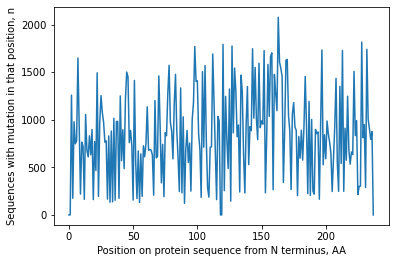

In [5]:
pltlist = mut_list
#pltlist[63] = 0
plt.plot(range(len(mut_list)), pltlist)

plt.xlabel('Position on protein sequence from N terminus, AA')
plt.ylabel('Sequences with mutation in that position, n')

<AxesSubplot:>

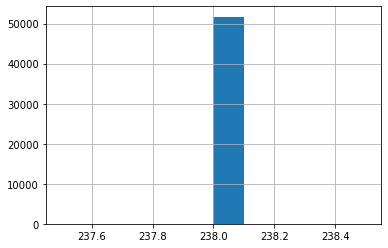

In [6]:
#look at sequence length distribution
sequences = data.Sequence
sequences.str.len().hist()

Text(0, 0.5, 'Number of sequences, n')

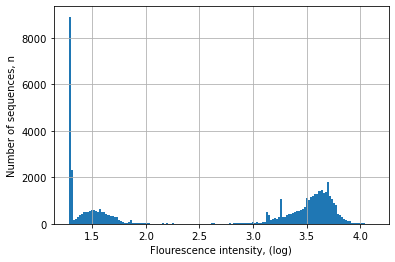

In [7]:
data["Data"].hist(bins=150)
plt.xlabel('Flourescence intensity, (log)')
plt.ylabel('Number of sequences, n')

In [16]:
data["Data"].value_counts()

1.301    8088
1.302     896
1.303     526
1.300     461
1.304     333
         ... 
2.441       1
2.327       1
3.925       1
2.927       1
2.331       1
Name: Data, Length: 2057, dtype: int64